In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [92]:
df = pd.read_csv("../../data/processed/full_data_for_ml.csv").drop(columns=["Unnamed: 0","steamId"])

In [83]:
df

,sales,averageRevenue,medianRevenue,publishedGames,price,earlyAccess,Accounting,Action,Adventure,Animation & Modeling,...,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Controller Support,VR Only,VR Supported,Valve Anti-Cheat enabled,indie,sales_category
0,8.404149,0.453316,0.587113,0.466248,0.451984,0,0,0,0,0,...,1,0,0,0,0,0,0,0,True,5
1,13.475520,0.762018,0.493235,0.227723,0.647464,0,0,0,0,0,...,1,0,1,0,0,0,0,0,True,9
2,6.207449,0.333886,0.521493,0.000000,0.337546,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,4
3,3.663562,0.450807,0.620089,0.166560,0.451984,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,2
4,11.548621,0.762480,0.829376,0.073704,0.573996,0,0,1,1,0,...,1,0,0,0,0,0,0,0,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17785,3.610918,0.000000,0.186124,0.656380,0.129757,0,0,1,0,0,...,0,0,0,0,0,0,0,0,True,2
17786,4.343805,0.234036,0.347340,0.479719,0.260932,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,2
17787,7.483244,0.271885,0.492761,0.125998,0.303104,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,5
17788,2.772589,0.214907,0.398674,0.498221,0.337546,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,1


In [115]:
df['sales_category'] = pd.cut(df['sales'], bins=20, labels=False)

In [116]:
X = df.drop(['sales', 'sales_category'], axis=1)  # 移除原始 sales 列和新创建的类别列
y = df['sales_category']

In [117]:
# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 创建 XGBoost 分类模型
model = xgb.XGBClassifier(objective='multi:softprob', num_class=20, use_label_encoder=False)

# 5. 训练模型
model.fit(X_train, y_train)

# 6. 预测并评估
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("分类准确率:", accuracy)

c:\Users\Nico\anaconda3\envs\dev310-mldl\lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


分类准确率: 0.23974142776840923


In [119]:
df100 = pd.concat([df.iloc[[0]]] * 100, ignore_index=True).drop(columns=["sales","sales_category"])
df100
df100['price'] = np.linspace(0.1, 1, 100)
df100

,averageRevenue,medianRevenue,publishedGames,price,earlyAccess,Accounting,Action,Adventure,Animation & Modeling,Audio Production,...,Steam Timeline,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Controller Support,VR Only,VR Supported,Valve Anti-Cheat enabled,indie
0,0.453316,0.587113,0.466248,0.100000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
1,0.453316,0.587113,0.466248,0.109091,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
2,0.453316,0.587113,0.466248,0.118182,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
3,0.453316,0.587113,0.466248,0.127273,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
4,0.453316,0.587113,0.466248,0.136364,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.453316,0.587113,0.466248,0.963636,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
96,0.453316,0.587113,0.466248,0.972727,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
97,0.453316,0.587113,0.466248,0.981818,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
98,0.453316,0.587113,0.466248,0.990909,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True


In [120]:
# 使用已訓練好的模型進行預測
y_pred_new_100 = model.predict(df100)
y_pred_proba_100 = model.predict_proba(df100)
# 顯示預測結果
print("預測分類結果:", y_pred_new_100)


預測分類結果: [11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11  8  8  8  8  8  8
  8  8  8  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9 10 10 10  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7]


In [130]:
y = []
std_devs_100 = np.std(y_pred_proba_100, axis=1)
for i in range(100):
    y.append(y_pred_new_100[i]/std_devs_100[i])

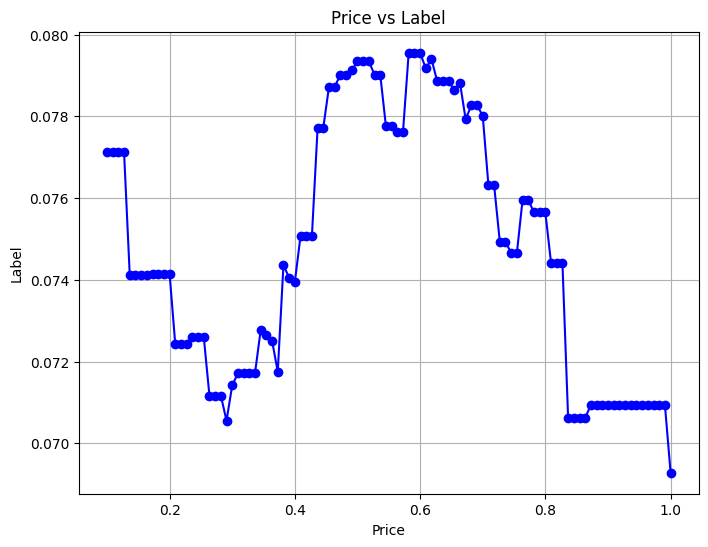

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
# 繪製 price (x) 與 label (y) 的圖表
plt.figure(figsize=(8, 6))
plt.plot(df100['price'], std_devs_100, marker='o', linestyle='-', color='b')
plt.xlabel('Price')
plt.ylabel('Label')
plt.title('Price vs Label')
plt.grid(True)
plt.show()
#15 標準差

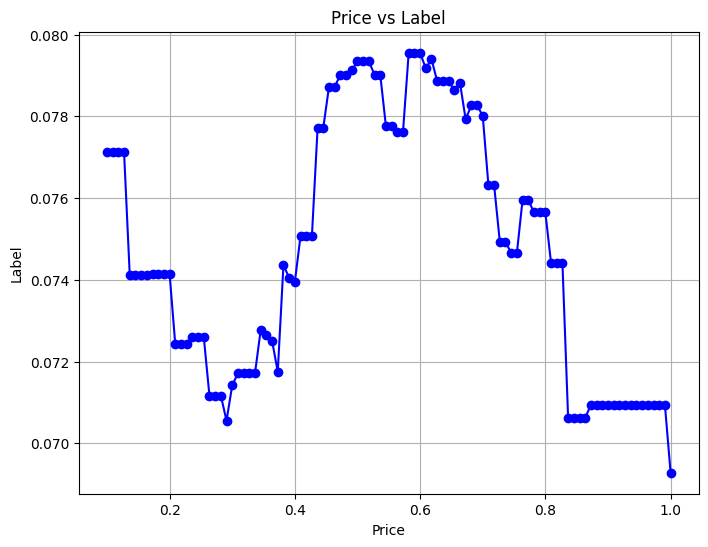

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
# 繪製 price (x) 與 label (y) 的圖表
plt.figure(figsize=(8, 6))
plt.plot(df100['price'], std_devs_100, marker='o', linestyle='-', color='b')
plt.xlabel('Price')
plt.ylabel('Label')
plt.title('Price vs Label')
plt.grid(True)
plt.show()
#10 標準差

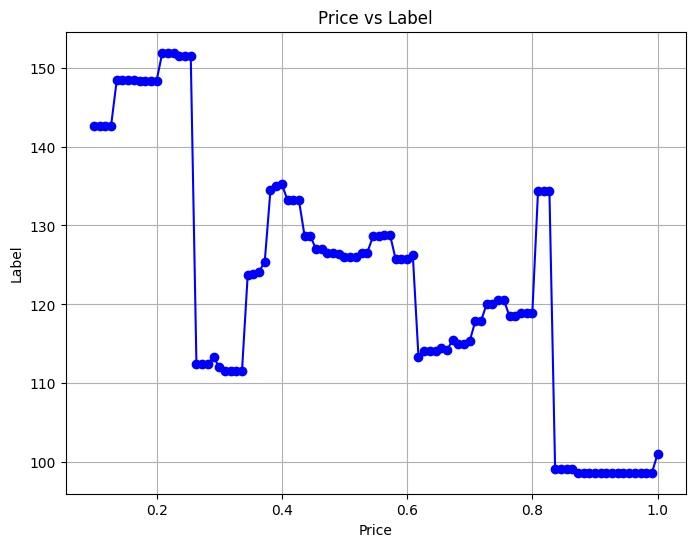

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
# 繪製 price (x) 與 label (y) 的圖表
plt.figure(figsize=(8, 6))
plt.plot(df100['price'], y, marker='o', linestyle='-', color='b')
plt.xlabel('Price')
plt.ylabel('Label')
plt.title('Price vs Label')
plt.grid(True)
plt.show()
#15 結果

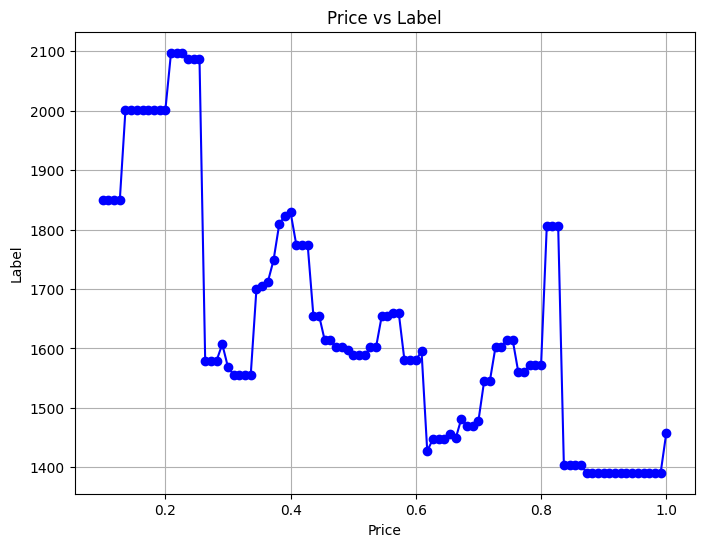

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
# 繪製 price (x) 與 label (y) 的圖表
plt.figure(figsize=(8, 6))
plt.plot(df100['price'], y, marker='o', linestyle='-', color='b')
plt.xlabel('Price')
plt.ylabel('Label')
plt.title('Price vs Label')
plt.grid(True)
plt.show()
#10 結果